<a href="https://colab.research.google.com/github/aitesam961/fuzzy-fishtick/blob/main/MADALINE_Rule_I_v1p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MADALINE: Multiple ADAptive LINear Elements**

## Key Features;

1- Uses non-linear activation functions   
2- Like ADALINE, eliminates the MSE    
3- Unlike ADALINE, suitable for multi-layer networks  





Epoch: 0 w1: 0.51114275 E1: 0.2685 w2: 0.70769825 E2: 0.18550000000000003
Epoch: 1 w1: 0.5220935939881249 E1: 0.26387575875 w2: 0.715263916889375 E2: 0.18230522625
Epoch: 2 w1: 0.5328558370656644 E1: 0.2593311584949282 w2: 0.7226992840807477 E2: 0.17916547449090944
Epoch: 3 w1: 0.543432727411801 E1: 0.2548648276177493 w2: 0.7300065956606671 E2: 0.17607979710648972
Epoch: 4 w1: 0.5538274572639513 E1: 0.2504754181241026 w2: 0.7371880570669013 E2: 0.17304726280082322
Epoch: 5 w1: 0.5640431638812229 E1: 0.24616160523546024 w2: 0.7442458357540666 E2: 0.170066956317236
Epoch: 6 w1: 0.5740829304912786 E1: 0.24192208698929252 w2: 0.7511820618477921 E2: 0.16713797816206244
Epoch: 7 w1: 0.5839497872208925 E1: 0.23775558384611944 w2: 0.7579988287876185 E2: 0.1642594443331663
Epoch: 8 w1: 0.5936467120104807 E1: 0.23366083830332962 w2: 0.7646981939588238 E2: 0.16143048605313834
Epoch: 9 w1: 0.6031766315128801 E1: 0.2296366145156506 w2: 0.771282179313368 E2: 0.15865024950708817
Epoch: 10 w1: 0.61254

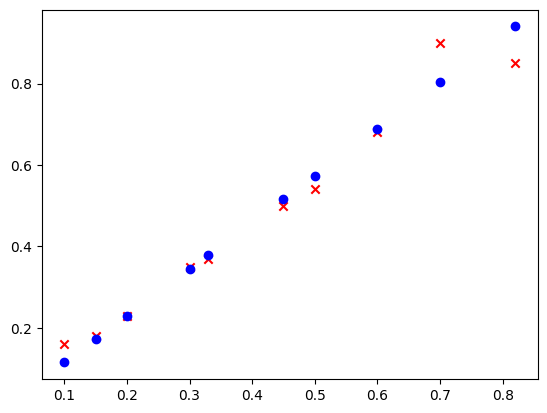

In [32]:
# input observations

x = [0.10, 0.30, 0.60, 0.70, 0.20, 0.45, 0.50, 0.82, 0.15, 0.33]
N = len(x)

# weights
w1 = 0.5
w2 = 0.7

# weights for pred. output
wo1 = 0.5
wo2 = 0.5

# learning rate
eta = 0.01

# targeted output
y = [0.16, 0.35, 0.68, 0.90, 0.23, 0.50, 0.54, 0.85, 0.18, 0.37]

max_epochs = 10000
threshold  = 0.0000000001

# runtime variables
E1 = 0
E2 = 0
dw1 = 0
dw2 = 0

dy1 = [0.0]*N
dy2 = [0.0]*N

error1 = [0.0]*N
error2 = [0.0]*N

dy  = [0.0]*N
# execution body


for epochs in range(max_epochs):
  # ADALINE-1
  for index in range(N):
    dy1[index] = w1 * x[index]
  # error1 = [y[i] - dy1[i] for i in range(N)]
  E1 = (1/N)* sum([y[i] - dy1[i] for i in range(N)])

  w_sum = 0
  for i in range(N):
    w_sum +=  x[i]
  dw1 = eta * E1 * w_sum
  w1 = w1 + dw1

  # ADALINE-2
  for index in range(N):
    dy2[index] = w2 * x[index]
  # error2 = [y[i] - dy2[i] for i in range(N)]
  E2 = (1/N)* sum([y[i] - dy2[i] for i in range(N)])

  w_sum = 0
  for i in range(N):
    w_sum += x[i]
  dw2 = eta* E2 * w_sum
  w2 = w2 + dw2

  print("Epoch:", epochs, "w1:",w1, "E1:",E1, "w2:",w2, "E2:",E2)
  if(E1 < threshold and E2 < threshold):
    print("CONVERGED.....")
    break

# calculate dy
for index in range(N):
  dy[index] = wo1 * dy1[index] + wo2 * dy2[index]

print("===========================================================================================================")
print("dy:",dy )
print("===========================================================================================================")


if(E1 > threshold and E2 > threshold):
  print("FAILED to Converge")
  print("dy:",dy )

import matplotlib.pyplot as plt

plt.scatter(x, y, marker='x', color='red', label='Target Output')
plt.scatter(x, dy, marker='o', color='blue', label='Achieved Output')


plt.show()

